<a href="https://colab.research.google.com/github/lawielas/ksitm-it/blob/master/leadpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [ ]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = data_generator.flow_from_directory(
    '/content/drive/MyDrive/DATASET/Training',
    target_size= (224, 224),
    batch_size= 100,
    class_mode='categorical'
)

Found 5722 images belonging to 4 classes.


In [ ]:
test_gen = data_generator.flow_from_directory(
    '/content/drive/MyDrive/DATASET/Testing',
    target_size= (224, 224),
    batch_size = 100,
    class_mode= 'categorical'
)

Found 1311 images belonging to 4 classes.


#GoogleNet

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
google_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
google_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

google_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,756 (24.59 MB)

 Trainable params: 6,446,756 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor= 'loss',
    patience= 3
)

In [ ]:
google_history = google_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 4509s 70s/step - accuracy: 0.2298 - loss: 8.4731 - precision: 0.2261 - recall: 0.4111 - val_accuracy: 0.2288 - val_loss: 8.5816 - val_precision: 0.2311 - val_recall: 0.4622
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 485ms/step - accuracy: 0.2348 - loss: 7.7999 - precision: 0.2314 - recall: 0.4629 - val_accuracy: 0.2288 - val_loss: 7.5611 - val_precision: 0.2311 - val_recall: 0.4622
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 488ms/step - accuracy: 0.2374 - loss: 7.2037 - precision: 0.2297 - recall: 0.4595 - val_accuracy: 0.2288 - val_loss: 7.5488 - val_precision: 0.2311 - val_recall: 0.4622
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 486ms/step - accuracy: 0.2292 - loss: 7.1770 - precision: 0.2332 - recall: 0.4665 - val_accuracy: 0.2288 - val_loss: 7.5488 - val_precision: 0.2311 - val_recall: 0.4622
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 497ms/step - accuracy: 0.2345 - loss: 7.0978 - precision: 0.2331 - recall: 0.4662 - val_accuracy: 0.2288 - val_loss: 7.54

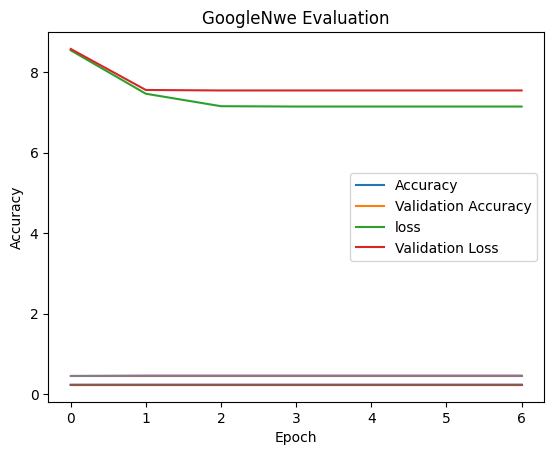

In [ ]:
import matplotlib.pyplot as plt
plt.plot(google_history.history["accuracy"])
plt.plot(google_history.history['val_accuracy'])
plt.plot(google_history.history['loss'])
plt.plot(google_history.history['val_loss'])
plt.plot(google_history.history['precision'])
plt.plot(google_history.history['val_precision'])
plt.plot(google_history.history['recall'])
plt.plot(google_history.history['val_recall'])
plt.title("GoogleNwe Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
google_model.save('/content/drive/MyDrive/DATASET/new_models/google_model.h5')
google_model.save('/content/drive/MyDrive/DATASET/new_models/google_model.keras')

In [ ]:
print("The performance by GoogleNet model is")
google_Val=google_model.evaluate(test_gen)
print(google_Val)
print("Loss is ",str(google_Val[0]))
print("The accuracy is ",str(google_Val[1]))
# print("The Area Under Curve is ",str(efficient_Val[2]))
print("The Precision is ",str(google_Val[2]))
print("The Recall is ",str(google_Val[3]))

The performance by GoogleNet model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.2279 - loss: 7.5218 - precision: 0.2349 - recall: 0.4697
[7.548825740814209, 0.22883294522762299, 0.23112128674983978, 0.46224257349967957]
Loss is  7.548825740814209
The accuracy is  0.22883294522762299
The Precision is  0.23112128674983978
The Recall is  0.46224257349967957


#AlexNet

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

In [ ]:
alex_model = Sequential()

alex_model.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alex_model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alex_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
alex_model.add(Activation('relu'))

alex_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
alex_model.add(Activation('relu'))
alex_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
alex_model.add(Activation('relu'))

alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alex_model.add(Flatten())
alex_model.add(Dense(200, input_shape=(224*224*3,)))
alex_model.add(Activation('relu'))
alex_model.add(Dropout(0.25))
alex_model.add(Dense(100))
alex_model.add(Activation('relu'))

alex_model.add(Dropout(0.2))
alex_model.add(Dense(50))
alex_model.add(Activation('relu'))
alex_model.add(Dropout(0.1))

alex_model.add(Dense(4))
alex_model.add(Activation('softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 54, 54, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 17, 17, 64)          │         247,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          51,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 742,226 (2.83 MB)

 Trainable params: 742,226 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
alex_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

alex_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 54, 54, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 17, 17, 64)          │         247,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          51,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 742,226 (2.83 MB)

 Trainable params: 742,226 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
alex_history = alex_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 801ms/step - accuracy: 0.3349 - loss: 2.3859 - precision: 0.4822 - recall: 0.1852 - val_accuracy: 0.4333 - val_loss: 1.2130 - val_precision: 0.6720 - val_recall: 0.1922
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.4982 - loss: 1.1179 - precision: 0.7164 - recall: 0.2090 - val_accuracy: 0.6491 - val_loss: 0.9435 - val_precision: 0.6988 - val_recall: 0.5751
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 476ms/step - accuracy: 0.7009 - loss: 0.8047 - precision: 0.7727 - recall: 0.5908 - val_accuracy: 0.7551 - val_loss: 0.6183 - val_precision: 0.7814 - val_recall: 0.7117
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - accuracy: 0.7996 - loss: 0.5684 - precision: 0.8303 - recall: 0.7354 - val_accuracy: 0.7765 - val_loss: 0.5778 - val_precision: 0.8073 - val_recall: 0.7445
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 482ms/step - accuracy: 0.8202 - loss: 0.4857 - precision: 0.8561 - recall: 0.7732 - val_accuracy: 0.8375 - va

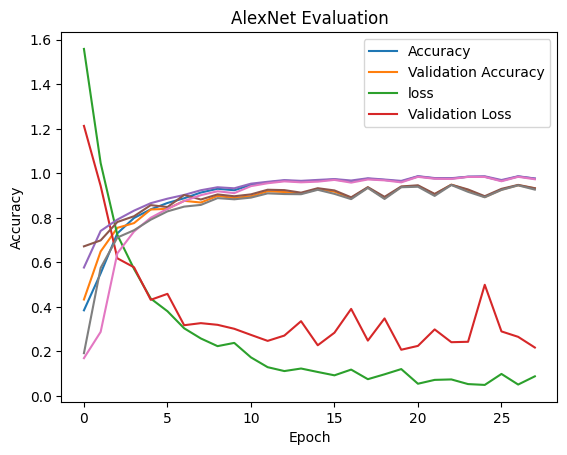

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alex_history.history["accuracy"])
plt.plot(alex_history.history['val_accuracy'])
plt.plot(alex_history.history['loss'])
plt.plot(alex_history.history['val_loss'])
plt.plot(alex_history.history['precision'])
plt.plot(alex_history.history['val_precision'])
plt.plot(alex_history.history['recall'])
plt.plot(alex_history.history['val_recall'])
plt.title("AlexNet Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
alex_model.save('/content/drive/MyDrive/DATASET/new_models/alex_model.h5')
alex_model.save('/content/drive/MyDrive/DATASET/new_models/alex_model.keras')

In [ ]:
print("The performance by EfficientNet model is")
alex_Val=alex_model.evaluate(test_gen)
print(alex_Val)
print("Loss is ",str(alex_Val[0]))
print("The accuracy is ",str(alex_Val[1]))
# print("The Area Under Curve is ",str(efficient_Val[2]))
print("The Precision is ",str(alex_Val[2]))
print("The Recall is ",str(alex_Val[3]))

The performance by EfficientNet model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step - accuracy: 0.9384 - loss: 0.2039 - precision: 0.9396 - recall: 0.9307
[0.2175322324037552, 0.9321128726005554, 0.9331797361373901, 0.9267734289169312]
Loss is  0.2175322324037552
The accuracy is  0.9321128726005554
The Precision is  0.9331797361373901
The Recall is  0.9267734289169312


#NasNet

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image
import cv2
from sklearn.utils import class_weight, shuffle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, GlobalAveragePooling2D,BatchNormalization, Input, Conv2D
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam, Adagrad, Adamax
from keras import backend as K
import keras
from keras.models import Model

In [ ]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = NASNetMobile(include_top=False,
                   weights='imagenet',
                   input_shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = base_model(bn)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1056, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_out, activation='sigmoid')(x)
    model = Model(input_tensor, output)

    return model

In [ ]:
nas_model = create_model(
    input_shape=(224,224,3),
    n_out=4)

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
nas_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

nas_model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ nasnet_mobile (Functional)           │ (None, 7, 7, 1056)          │       4,269,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1056)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1056)                │       1,116,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1056)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           4,228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,390,148 (20.56 MB)

 Trainable params: 5,353,404 (20.42 MB)

 Non-trainable params: 36,744 (143.53 KB)

In [ ]:
nas_history = nas_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - accuracy: 0.7661 - loss: 0.6369 - precision: 0.5490 - recall: 0.8783 - val_accuracy: 0.4691 - val_loss: 5.6671 - val_precision: 0.3859 - val_recall: 0.6362
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 524ms/step - accuracy: 0.9737 - loss: 0.0819 - precision: 0.7581 - recall: 0.9950 - val_accuracy: 0.6125 - val_loss: 2.0595 - val_precision: 0.4129 - val_recall: 0.7285
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 528ms/step - accuracy: 0.9864 - loss: 0.0367 - precision: 0.7758 - recall: 0.9994 - val_accuracy: 0.4104 - val_loss: 4.1349 - val_precision: 0.3272 - val_recall: 0.6529
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.9904 - loss: 0.0306 - precision: 0.8656 - recall: 0.9986 - val_accuracy: 0.6468 - val_loss: 2.5066 - val_precision: 0.4733 - val_recall: 0.7300
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 528ms/step - accuracy: 0.9889 - loss: 0.0317 - precision: 0.8077 - recall: 0.9990 - val_accuracy: 0.9062 - val_

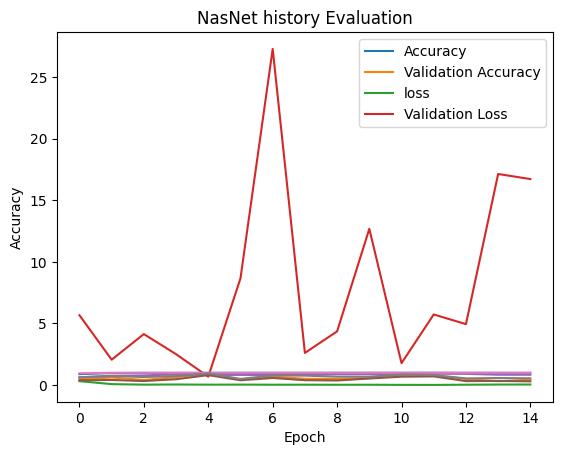

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nas_history.history["accuracy"])
plt.plot(nas_history.history['val_accuracy'])
plt.plot(nas_history.history['loss'])
plt.plot(nas_history.history['val_loss'])
plt.plot(nas_history.history['precision'])
plt.plot(nas_history.history['val_precision'])
plt.plot(nas_history.history['recall'])
plt.plot(nas_history.history['val_recall'])
plt.title("NasNet history Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
nas_model.save('/content/drive/MyDrive/DATASET/new_models/nas_model.h5')
nas_model.save('/content/drive/MyDrive/DATASET/new_models/nas_model.keras')

In [ ]:
print("The performance by EfficientNet model is")
nas_Val=nas_model.evaluate(test_gen)
print(nas_Val)
print("Loss is ",str(nas_Val[0]))
print("The accuracy is ",str(nas_Val[1]))
# print("The Area Under Curve is ",str(efficient_Val[2]))
print("The Precision is ",str(nas_Val[2]))
print("The Recall is ",str(nas_Val[3]))

The performance by EfficientNet model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.4239 - loss: 16.9999 - precision: 0.2972 - recall: 0.5388
[16.710655212402344, 0.4363081753253937, 0.3030303120613098, 0.549199104309082]
Loss is  16.710655212402344
The accuracy is  0.4363081753253937
The Precision is  0.3030303120613098
The Recall is  0.549199104309082


#SqueezeNet

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.layers import Concatenate, Add
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout

from tensorflow.keras.utils import plot_model

import warnings
warnings.simplefilter('ignore')

In [ ]:
one = (1, 1)
two = (2, 2)
three = (3, 3)
five = (5, 5)
seven = (7, 7)
thirteen = (13, 13)

input_shape = (224, 224, 3)

In [ ]:
class FireModule(object):
    """
    Fire Module computed as per the SqueezeNet paper
    """

    def __init__(self, layer_number: int, activation: str, kernel_initializer: str) -> None:
        """
        Constructor

        Arguments:
          layer_number       : Index of the Fire Module
          activation         : Activation to be used
          kernel_initializer : Kernel Weight Initialization technique

        Returns:
          None
        """
        self.layer_number = layer_number
        self.activation = activation
        self.kernel_initializer = kernel_initializer

    def build_module(self, fire_input: Layer) -> Layer:
        """
        Build the SqueezeNet

        Arguments:
          fire_input       : Input to Fire Module

        Returns:
          model            : SqueezeNet
        """

        global one, three, five
        output_size = 128 * (1 + (self.layer_number//2))

        squeeze_1x1_filters = 16 * (1 + (self.layer_number//2))
        expand_1x1_filters = expand_3x3_filters = output_size//2

        squeeze_1x1 = Conv2D(name=f'fire_{self.layer_number+2}_squeeze_1x1',
            filters=squeeze_1x1_filters, kernel_size=one, strides=1, padding='valid', activation=self.activation,
            kernel_initializer=self.kernel_initializer)(fire_input)
        expand_1x1 = Conv2D(name=f'fire_{self.layer_number+2}_expand_1x1',
            filters=expand_1x1_filters, kernel_size=one, strides=1, padding='valid', activation=self.activation,
            kernel_initializer=self.kernel_initializer)(squeeze_1x1)
        expand_3x3 = Conv2D(name=f'fire_{self.layer_number+2}_expand_3x3',
            filters=expand_3x3_filters, kernel_size=three, strides=1, padding='same', activation=self.activation,
            kernel_initializer=self.kernel_initializer)(squeeze_1x1)

        fire = Concatenate(name=f'fire_{self.layer_number+2}')([expand_1x1, expand_3x3])

        return fire

In [ ]:
class SqueezeNet(object):
    """
    SqueezeNet Architecture
    """

    def __init__(self, activation: str='relu', kernel_initializer: str='glorot_uniform') -> None:
        """
        Constructor

        Arguments:
          activation         : Activation to be used
          kernel_initializer : Kernel Weight Initialization technique

        Returns:
          None
        """

        self.activation = activation
        self.kernel_initializer = kernel_initializer

    def vanilla_model(self, input_shape: tuple=(224, 224, 3), n_classes: int=1000) -> None:
        """
        Vanilla Implementation of SqueezeNet

        Arguments:
          input_shape         : Input Shape of the images
          n_classes           : Number of output classes

        Returns:
          None
        """

        inp = Input(shape=input_shape, name='Input')

        # Conv1 Layer
        conv_1 = Conv2D(name="Conv_1",
            filters=96, kernel_size=seven, strides=2, padding='same', activation=self.activation, kernel_initializer=self.kernel_initializer)(inp)
        maxpool_1 = MaxPool2D(name="MaxPool_1",
            pool_size=three, strides=2)(conv_1)

        # Fire 2-4
        fire_2 = FireModule(layer_number=0, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_1)
        fire_3 = FireModule(layer_number=1, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_2)
        fire_4 = FireModule(layer_number=2, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_3)

        # Max Pool after Fire4 Module
        maxpool_2 = MaxPool2D(name="MaxPool_2",
            pool_size=three, strides=2)(fire_4)

        # Fire 5-8
        fire_5 = FireModule(layer_number=3, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_2)
        fire_6 = FireModule(layer_number=4, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_5)
        fire_7 = FireModule(layer_number=5, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_6)
        fire_8 = FireModule(layer_number=6, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_7)

        # Max Pool after Fire8 Module
        maxpool_3 = MaxPool2D(name="MaxPool_3",
            pool_size=three, strides=2)(fire_8)

        fire_9 = FireModule(layer_number=7, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_3)

        # Dropout
        dropout = Dropout(0.5, name="Dropout")(fire_9)

        # Conv10 layer
        conv_10 = Conv2D(name="Conv_10",
            filters=1000, kernel_size=one, strides=1, padding='valid', activation=self.activation, kernel_initializer=self.kernel_initializer)(dropout)
        gap_11 = GlobalAveragePooling2D()(conv_10)


        if n_classes != 1000:
            # Add Dense(n_classes) and ouput == Dense layer
            out = Dense(n_classes, activation='softmax')(gap_11)
        else:
            out = gap_11

        self.model = Model(inputs=inp, outputs=out)


    def bypass_model(self, input_shape: tuple=(224, 224, 3), n_classes: int=1000) -> None:
        """
        Residual Inspired Bypass Implementation of SqueezeNet

        Arguments:
          input_shape         : Input Shape of the images
          n_classes           : Number of output classes

        Returns:
          None
        """

        inp = Input(shape=input_shape, name='Input')

        # Conv1 Layer
        conv_1 = Conv2D(name="Conv_1",
            filters=96, kernel_size=seven, strides=2, padding='same', activation=self.activation, kernel_initializer=self.kernel_initializer)(inp)
        maxpool_1 = MaxPool2D(name="MaxPool_1",
            pool_size=three, strides=2)(conv_1)

        # Fire 2-4
        fire_2 = FireModule(layer_number=0, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_1)
        fire_3 = FireModule(layer_number=1, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_2)
        bypass_1 = Add(name="Bypass_1")([fire_2, fire_3])
        fire_4 = FireModule(layer_number=2, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(bypass_1)

        # Max Pool after Fire4 Module
        maxpool_2 = MaxPool2D(name="MaxPool_2",
            pool_size=three, strides=2)(fire_4)

        # Fire 5-8
        fire_5 = FireModule(layer_number=3, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_2)
        bypass_2 = Add(name="Bypass_2")([maxpool_2, fire_5])
        fire_6 = FireModule(layer_number=4, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(bypass_2)
        fire_7 = FireModule(layer_number=5, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(fire_6)
        bypass_3 = Add(name="Bypass_3")([fire_6, fire_7])
        fire_8 = FireModule(layer_number=6, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(bypass_3)

        # Max Pool after Fire8 Module
        maxpool_3 = MaxPool2D(name="MaxPool_3",
            pool_size=three, strides=2)(fire_8)

        fire_9 = FireModule(layer_number=7, activation=self.activation, kernel_initializer=self.kernel_initializer).build_module(maxpool_3)
        bypass_4 = Add(name="Bypass_4")([maxpool_3, fire_9])

        # Dropout
        dropout = Dropout(0.5, name="Dropout")(bypass_4)

        # Conv10 layer
        conv_10 = Conv2D(name="Conv_10",
            filters=1000, kernel_size=one, strides=1, padding='valid', activation=self.activation, kernel_initializer=self.kernel_initializer)(dropout)
        gap_11 = GlobalAveragePooling2D()(conv_10)


        if n_classes != 1000:
            out = Dense(n_classes, activation='softmax')(gap_11)
        else:
            out = gap_11

        self.model = Model(inputs=inp, outputs=out)


    def build_model(self, input_shape: tuple=(224, 224, 3), n_classes: int=4, choice: str='vanilla') -> Model:
        """
        Build SqueezeNet

        Arguments:
          input_shape         : Input Shape of the images
          n_classes           : Number of output classes
          choice              : Type of architecture (vanilla/bypass)
        Returns:
          model               : SqueezeNet Model
        """

        if choice == "vanilla":
            self.vanilla_model(input_shape, n_classes)
        else:
            self.bypass_model(input_shape, n_classes)

        return self.model

In [ ]:
snet = SqueezeNet()

sq_model = snet.build_model(n_classes=4, choice='bypass')
sq_model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv_1 (Conv2D)           │ (None, 112, 112, 96)   │         14,208 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool_1 (MaxPooling2D)  │ (None, 55, 55, 96)     │              0 │ Conv_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_squeeze_1x1        │ (None, 55, 55, 16)     │          1,552 │ MaxPool_1[0][0]        │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_expand_1x1         │ (None, 55, 55, 64)     │          1,088 │ fire_2_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_expand_3x3         │ (None, 55, 55, 64)     │          9,280 │ fire_2_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2 (Concatenate)      │ (None, 55, 55, 128)    │              0 │ fire_2_expand_1x1[0][… │
│                           │                        │                │ fire_2_expand_3x3[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_squeeze_1x1        │ (None, 55, 55, 16)     │          2,064 │ fire_2[0][0]           │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_expand_1x1         │ (None, 55, 55, 64)     │          1,088 │ fire_3_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_expand_3x3         │ (None, 55, 55, 64)     │          9,280 │ fire_3_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3 (Concatenate)      │ (None, 55, 55, 128)    │              0 │ fire_3_expand_1x1[0][… │
│                           │                        │                │ fire_3_expand_3x3[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Bypass_1 (Add)            │ (None, 55, 55, 128)    │              0 │ fire_2[0][0],          │
│                           │                        │                │ fire_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_4_squeeze_1x1        │ (None, 55, 55, 32)     │          4,128 │ Bypass_1[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_4_expand_1x1         │ (None, 55, 55, 128)    │          4,224 │ fire_4_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 1,252,428 (4.78 MB)

 Trainable params: 1,252,428 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
    ])

sq_model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv_1 (Conv2D)           │ (None, 112, 112, 96)   │         14,208 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool_1 (MaxPooling2D)  │ (None, 55, 55, 96)     │              0 │ Conv_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_squeeze_1x1        │ (None, 55, 55, 16)     │          1,552 │ MaxPool_1[0][0]        │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_expand_1x1         │ (None, 55, 55, 64)     │          1,088 │ fire_2_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2_expand_3x3         │ (None, 55, 55, 64)     │          9,280 │ fire_2_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_2 (Concatenate)      │ (None, 55, 55, 128)    │              0 │ fire_2_expand_1x1[0][… │
│                           │                        │                │ fire_2_expand_3x3[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_squeeze_1x1        │ (None, 55, 55, 16)     │          2,064 │ fire_2[0][0]           │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_expand_1x1         │ (None, 55, 55, 64)     │          1,088 │ fire_3_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3_expand_3x3         │ (None, 55, 55, 64)     │          9,280 │ fire_3_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_3 (Concatenate)      │ (None, 55, 55, 128)    │              0 │ fire_3_expand_1x1[0][… │
│                           │                        │                │ fire_3_expand_3x3[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Bypass_1 (Add)            │ (None, 55, 55, 128)    │              0 │ fire_2[0][0],          │
│                           │                        │                │ fire_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_4_squeeze_1x1        │ (None, 55, 55, 32)     │          4,128 │ Bypass_1[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fire_4_expand_1x1         │ (None, 55, 55, 128)    │          4,224 │ fire_4_squeeze_1x1[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 1,252,428 (4.78 MB)

 Trainable params: 1,252,428 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sq_history = sq_model.fit(train_gen,
                    epochs=100,
                    # steps_per_epoch=len(train_gen),
                    validation_data=test_gen,
                     callbacks= [callback],
                    # validation_steps=len(test_gen)
                    )

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 848ms/step - accuracy: 0.3545 - loss: 1.3132 - precision: 0.6405 - recall: 0.1398 - val_accuracy: 0.4874 - val_loss: 1.0845 - val_precision: 0.6867 - val_recall: 0.1571
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 493ms/step - accuracy: 0.5388 - loss: 1.0308 - precision: 0.8675 - recall: 0.2179 - val_accuracy: 0.5721 - val_loss: 0.9847 - val_precision: 0.7396 - val_recall: 0.2990
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 491ms/step - accuracy: 0.5853 - loss: 0.9527 - precision: 0.7815 - recall: 0.3479 - val_accuracy: 0.6011 - val_loss: 0.9789 - val_precision: 0.7760 - val_recall: 0.3249


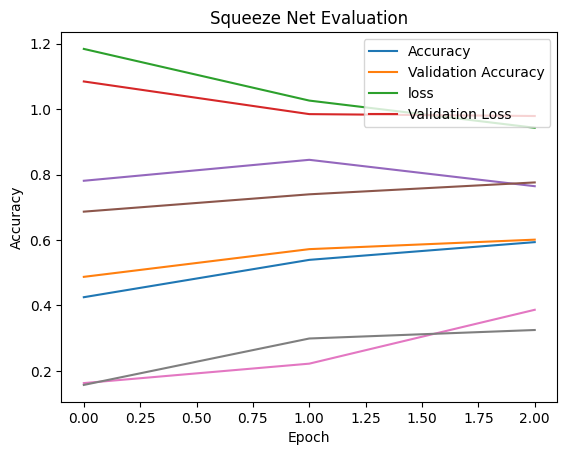

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sq_history.history["accuracy"])
plt.plot(sq_history.history['val_accuracy'])
plt.plot(sq_history.history['loss'])
plt.plot(sq_history.history['val_loss'])
plt.plot(sq_history.history['precision'])
plt.plot(sq_history.history['val_precision'])
plt.plot(sq_history.history['recall'])
plt.plot(sq_history.history['val_recall'])
plt.title("Squeeze Net Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
sq_model.save('/content/drive/MyDrive/DATASET/new_models/squeeze.h5')
sq_model.save('/content/drive/MyDrive/DATASET/new_models/squeeze.keras')

In [ ]:
print("The performance by EfficientNet model is")
sq_Val=sq_model.evaluate(test_gen)
print(sq_Val)
print("Loss is ",str(sq_Val[0]))
print("The accuracy is ",str(sq_Val[1]))
# print("The Area Under Curve is ",str(efficient_Val[2]))
print("The Precision is ",str(sq_Val[2]))
print("The Recall is ",str(sq_Val[3]))

The performance by EfficientNet model is
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.5998 - loss: 0.9763 - precision: 0.7681 - recall: 0.3271
[0.9789373278617859, 0.6010679006576538, 0.7759562730789185, 0.32494279742240906]
Loss is  0.9789373278617859
The accuracy is  0.6010679006576538
The Precision is  0.7759562730789185
The Recall is  0.32494279742240906
